# Predicting song genres using a decision tree

In [7]:
import pandas as pd
pd.options.display.max_columns = 200

songs = pd.read_csv('../data/spotify_data.csv', index_col=[0])
songs.head(10)

track_id                               artists   
0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino  \
1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                          album_name   
0                                             Comedy  \
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
5                               Days I Will Remember   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   
8                We Sing. We Dance. We Steal Things.   
9                                             Hunger   

                   track_name  popularity  duration_ms  explicit   
0                      Comedy          73       230666     False  \
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness   
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322  \
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   
5         0.688  0.4810    6    -8.807     1       0.1050        0.2890   
6         0.407  0.1470    2    -8.822     1       0.0355        0.8570   
7         0.703  0.4440   11    -9.331     1       0.0417        0.5590   
8         0.625  0.4140    0    -8.700     1       0.0369        0.2940   
9         0.442  0.6320    1    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580   0.7150   87.917               4    acoustic  
1          0.000006    0.1010   0.2670   77.489               4    acoustic  
2          0.000000    0.1170   0.1200   76.332               4    acoustic  
3          0.000071    0.1320   0.1430  181.740               3    acoustic  
4          0.000000    0.0829   0.1670  119.949               4    acoustic  
5          0.000000    0.1890   0.6660   98.017               4    acoustic  
6          0.000003    0.0913   0.0765  141.284               3    acoustic  
7          0.000000    0.0973   0.7120  150.960               4    acoustic  
8          0.000000    0.1510   0.6690  130.088               4    acoustic  
9          0.004190    0.0735   0.1960   78.899               4    acoustic

### Before cleaning the data

In [10]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

### After cleaning the data

In [11]:
songs = songs.drop_duplicates(['track_name','artists'])
# Drop rows with missing values
songs.dropna(inplace=True)
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81343 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          81343 non-null  object 
 1   artists           81343 non-null  object 
 2   album_name        81343 non-null  object 
 3   track_name        81343 non-null  object 
 4   popularity        81343 non-null  int64  
 5   duration_ms       81343 non-null  int64  
 6   explicit          81343 non-null  bool   
 7   danceability      81343 non-null  float64
 8   energy            81343 non-null  float64
 9   key               81343 non-null  int64  
 10  loudness          81343 non-null  float64
 11  mode              81343 non-null  int64  
 12  speechiness       81343 non-null  float64
 13  acousticness      81343 non-null  float64
 14  instrumentalness  81343 non-null  float64
 15  liveness          81343 non-null  float64
 16  valence           81343 non-null  float64
 1

### Fit model

In [9]:
import xgboost as xgb

In [19]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


songs_data = songs.drop(columns = ["track_id", "artists", "album_name", "track_name", "track_genre"])
genres = songs["track_genre"]
# Numerically encode the labels
label_encoder = LabelEncoder()
encoded_genres = label_encoder.fit_transform(genres)
# Using stratify might help because we have an imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(songs_data, encoded_genres, test_size=0.3, 
                                                    stratify=encoded_genres, shuffle=True, random_state=100)
# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluate performance

In [20]:
# Evaluate model
predictions = model.predict(X_test)
base_accuracy = accuracy_score(y_test, predictions)
base_f1_weighted = f1_score(y_test, predictions, average='weighted')
print("Baseline performance using a Decision Tree")
print(f"Accuracy: {base_accuracy}")
print(f"F1-score: {base_f1_weighted}")

Baseline performance using a Decision Tree
Accuracy: 0.3817153628652215
F1-score: 0.3760609269410091


Baseline performance using a Decision Tree
- Accuracy: 0.24775642339056672
- F1-score: 0.24918057374547498

In [26]:
def generate_predicitons_df(y_test, predictions, class_names):
    # Get more detailed performance information for each class
    f1 = f1_score(y_test, predictions, average=None)
    class_to_f1 = dict(zip(class_names, f1))
    # Sort f1-score in descending order
    class_to_f1 = dict(sorted(class_to_f1.items(), key=lambda item: item[1], reverse=True))
    grouped_by_genre = songs.groupby(['track_genre']).size()
    genre_count = grouped_by_genre.sort_values(ascending=False)
    count = list()
    for genre in class_to_f1.keys():
        count.append(genre_count[genre])
    predictions_df = pd.DataFrame([], columns=['genre', 'f1-score', 'count'])
    predictions_df['genre'] = class_to_f1.keys()
    predictions_df['f1-score'] = class_to_f1.values()
    predictions_df['count'] = count
    return predictions_df

predictions_df = generate_predicitons_df(y_test, predictions, label_encoder.classes_)
display(predictions_df)

genre  f1-score  count
0        comedy  0.797178    987
1     grindcore  0.776014    965
2         sleep  0.750000    945
3    honky-tonk  0.594714    826
4         study  0.581197    996
..          ...       ...    ...
108        rock  0.020619    167
109       house  0.000000    134
110       indie  0.000000    107
111        punk  0.000000    208
112   reggaeton  0.000000     63

[113 rows x 3 columns]

Worse performing classes seem to be the ones with lower number of samples

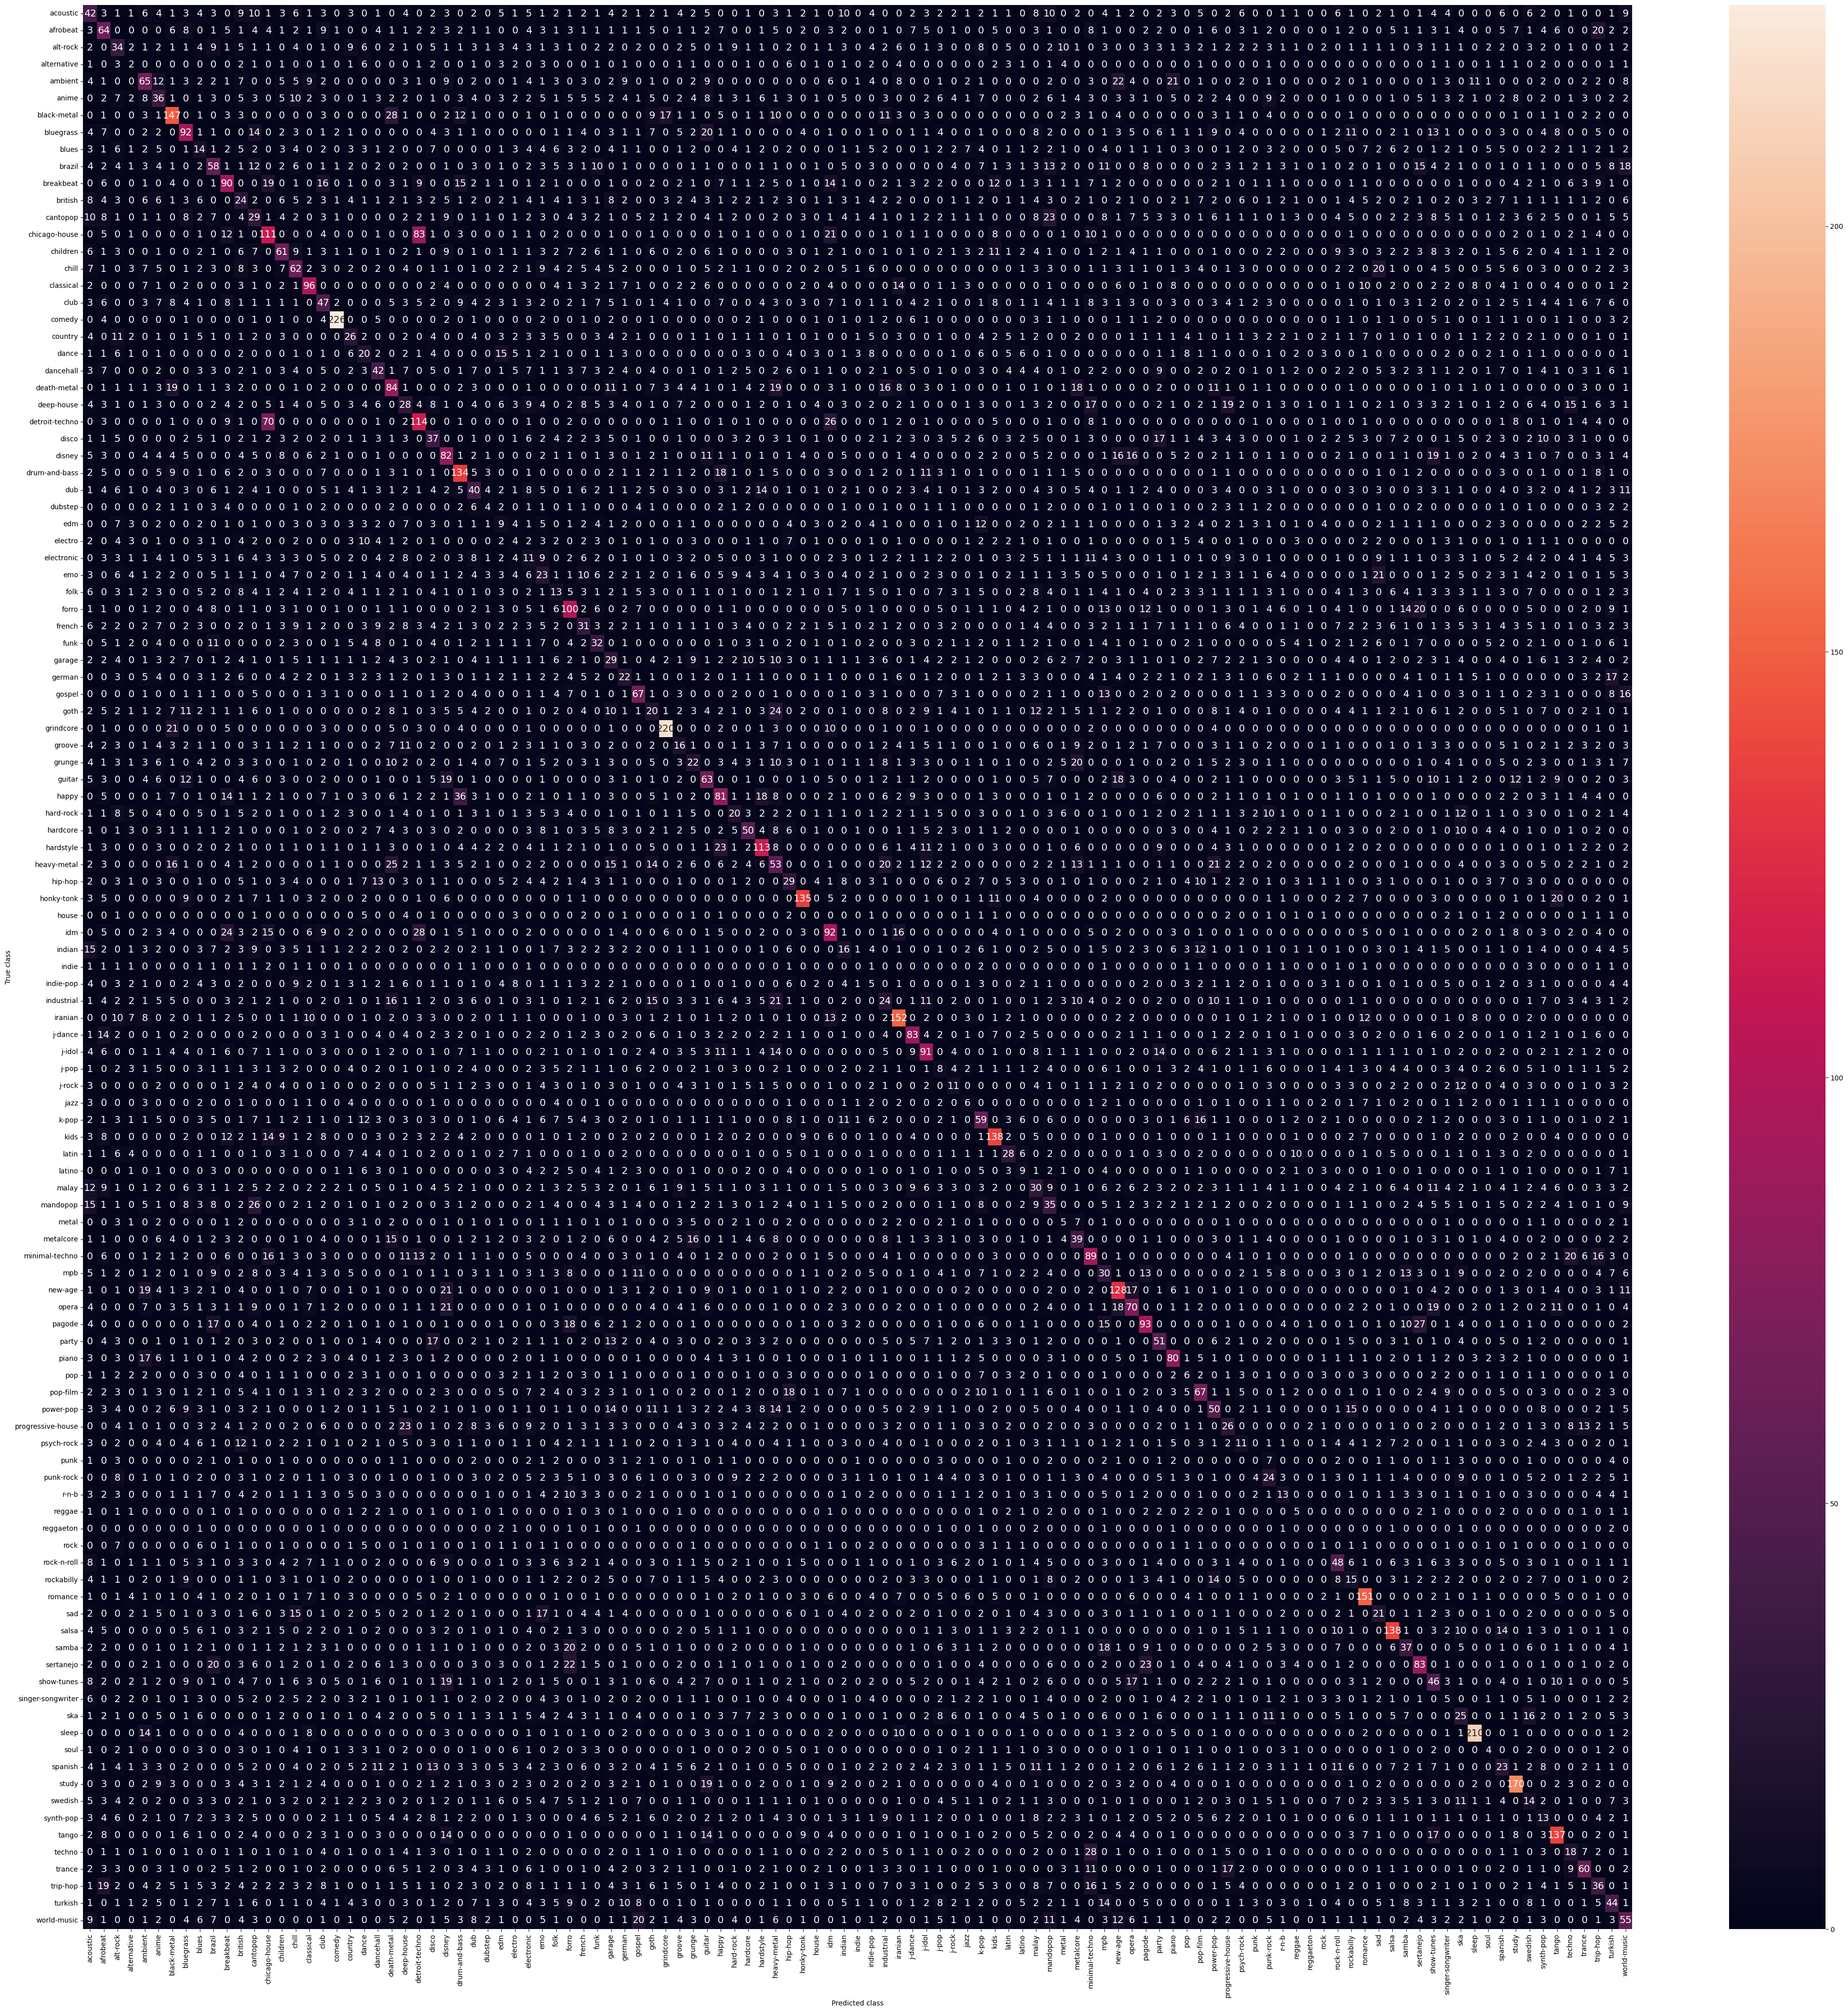

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, class_names):
    cm_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
    heatmap = sns.heatmap(cm_df, annot=True, fmt='d', annot_kws={"size": 14})
    heatmap.set(xlabel='Predicted class', ylabel='True class')
    return heatmap

cm = confusion_matrix(y_test, predictions)
heatmap = plot_confusion_matrix(cm, label_encoder.classes_)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

Confusion matrix is huge and hard to read because there's more than 100 genres we are trying to predict

Some insights from the confusion matrix:
- The model predicted _ambient_ several times when the real class was _piano_
- There were alot of mixups between the electronic music genres
    - The model predicted often _deep house_ when the true classes were _synth pop_ and _progressive house_
    - Model predicted ~50 times _chicago house_ when the song was actually _detroit techno_
        - Almost the same scenario vice-versa: ~40 predictions for _detroit techno_ when song was _chicago house_
    - Same case for _techno_ and _minimal techno_
- It's probably a good idea to simplify our classification problem by combining some genres together
    - Example: combine _house_, _deep house_, and _chicago house_ under _house_

## Incorporating features from string attributes

In [29]:
string_features = songs[['artists', 'album_name', 'track_name']]
string_features.head()

artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  
0                      Comedy  
1            Ghost - Acoustic  
2              To Begin Again  
3  Can't Help Falling In Love  
4                     Hold On

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

concatenated_features = (songs['artists'] + ' ' + songs['album_name'] + ' ' + songs['track_name']).to_list()
vectorizer = TfidfVectorizer()
count_matrix = vectorizer.fit_transform(concatenated_features)
print(f"Number of new features: {count_matrix.shape[1]}")

Number of new features: 77866


### Reduce number of features

In [31]:
# Use stemming and remove stopwords
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

stemmer = PorterStemmer()
token_pattern = re.compile(r"(?u)\b\w\w+\b")
my_stopwords = set(stopwords.words('english'))

def tokenize(text):
    stems = []
    tokens = token_pattern.findall(text)
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
tfid_vectorizer = TfidfVectorizer(tokenizer=tokenize, min_df=40)
tfid_matrix = tfid_vectorizer.fit_transform(concatenated_features)
print(f"Number of features (removing stopwords and using stemming): {tfid_matrix.shape[1]}")
df = pd.DataFrame(tfid_matrix.toarray(), columns=tfid_vectorizer.get_feature_names_out())

c:\Users\masam\anaconda3\envs\ml\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Number of features (removing stopwords and using stemming): 2193


In [34]:
songs_data.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
songs_data_modified = pd.concat([songs_data, df], axis=1)
display(songs_data_modified)

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0              73       230666     False         0.676  0.4610    1    -6.746   
1              55       149610     False         0.420  0.1660    1   -17.235   
2              57       210826     False         0.438  0.3590    0    -9.734   
3              71       201933     False         0.266  0.0596    0   -18.515   
4              82       198853     False         0.618  0.4430    2    -9.681   
...           ...          ...       ...           ...     ...  ...       ...   
81338          21       384999     False         0.172  0.2350    5   -16.393   
81339          22       385000     False         0.174  0.1170    0   -18.318   
81340          22       271466     False         0.629  0.3290    0   -10.895   
81341          41       283893     False         0.587  0.5060    7   -10.889   
81342          22       241826     False         0.526  0.4870    1   -10.204   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0         0       0.1430        0.0322          0.000001    0.3580   0.7150   
1         1       0.0763        0.9240          0.000006    0.1010   0.2670   
2         1       0.0557        0.2100          0.000000    0.1170   0.1200   
3         1       0.0363        0.9050          0.000071    0.1320   0.1430   
4         1       0.0526        0.4690          0.000000    0.0829   0.1670   
...     ...          ...           ...               ...       ...      ...   
81338     1       0.0422        0.6400          0.928000    0.0863   0.0339   
81339     0       0.0401        0.9940          0.976000    0.1050   0.0350   
81340     0       0.0420        0.8670          0.000000    0.0839   0.7430   
81341     1       0.0297        0.3810          0.000000    0.2700   0.4130   
81342     0       0.0725        0.6810          0.000000    0.0893   0.7080   

         tempo  time_signature   01   10  100  1000  10th   11   12   13   14  \
0       87.917               4  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
1       77.489               4  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
2       76.332               4  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
3      181.740               3  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
4      119.949               4  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
...        ...             ...  ...  ...  ...   ...   ...  ...  ...  ...  ...   
81338  125.995               5  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
81339   85.239               4  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
81340  132.378               4  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
81341  135.960               4  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   
81342   79.198               4  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   

        15   16   17   18   19  1990  1992  1995  1996  1997  1999   20  2000  \
0      0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
...    ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   
81338  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
81339  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
81340  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
81341  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
81342  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   

       2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.

In [37]:
# Using stratify might help because we have an imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(songs_data_modified, encoded_genres, test_size=0.3, 
                                                    stratify=encoded_genres, shuffle=True, random_state=100)
# Train model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
# Evaluate model
predictions = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1_weighted = f1_score(y_test, predictions, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1_weighted:.4f}")
print(f"{(f1_weighted - base_f1_weighted)/base_f1_weighted*100:.2f}% better performance when compared to baseline")

Accuracy: 0.35
F1-score: 0.35
41.31% better performance when compared to baseline


### Implement cross-validation and hyper-parameter tuning

In [43]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.pipeline import Pipeline

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
pipeline = Pipeline([
    ('estimator', DecisionTreeClassifier())])
predictions = cross_val_predict(pipeline, songs_data_modified, encoded_genres, cv=cv, n_jobs=-1)
accuracy = accuracy_score(encoded_genres, predictions)
f1_weighted = f1_score(encoded_genres, predictions, average='weighted')
print(f"Cross-validated accuracy: {accuracy:.4f}")
print(f"Cross-validated f1: {f1_weighted:.4f}")

Cross-validated accuracy: 0.3538
Cross-validated f1: 0.3544


In [46]:
from sklearn.model_selection import GridSearchCV
# !!! This cell takes a while to run (~35 mins)
# define the parameter grid
parameters = {
    'estimator__max_depth':[15, 70, 150, 200],
    'estimator__min_samples_split' :[10, 50, 100, 200],
    'estimator__min_samples_leaf':[5, 50, 100]
}
pipeline = Pipeline([
    ('estimator', DecisionTreeClassifier())])
# create the grid search estimator
grid_search_estimator = GridSearchCV(pipeline, parameters, scoring='f1_weighted', cv=cv)
# fit the grid search (= determine the optimal parameters)
grid_search_estimator.fit(songs_data_modified, encoded_genres)
print("Optimised Parameters: {}".format(grid_search_estimator.best_params_))

Optimised Parameters: {'estimator__max_depth': 150, 'estimator__min_samples_leaf': 5, 'estimator__min_samples_split': 50}


In [50]:
pipeline = Pipeline([
    ('estimator', DecisionTreeClassifier(criterion='gini', max_depth=150, min_samples_split=50, min_samples_leaf=5))])
predictions = cross_val_predict(pipeline, songs_data_modified, encoded_genres, cv=cv, n_jobs=-1)
accuracy = accuracy_score(encoded_genres, predictions)
f1_weighted = f1_score(encoded_genres, predictions, average='weighted')
print(f"Cross-validated accuracy: {accuracy:.4f}")
print(f"Cross-validated f1: {f1_weighted:.4f}")
print(f"{(f1_weighted - base_f1_weighted)/base_f1_weighted*100:.2f}% better performance when compared to baseline")

Cross-validated accuracy: 0.3681
Cross-validated f1: 0.3634
47.29% better performance when compared to baseline


## Experiment #1: Balancing
* Try to overcome the class imbalance problem by using under or over sampling

### Undersampling

In [52]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

sampler = RandomUnderSampler()
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=150, min_samples_split=50, min_samples_leaf=5)
pipeline = Pipeline([('balancing', sampler), ('classifier', decision_tree)])
predictions = cross_val_predict(pipeline, songs_data_modified, encoded_genres, cv=cv, n_jobs=-1)
accuracy = accuracy_score(encoded_genres, predictions)
f1_weighted = f1_score(encoded_genres, predictions, average='weighted')
print(f"Cross-validated accuracy: {accuracy:.4f}")
print(f"Cross-validated f1: {f1_weighted:.4f}")

Cross-validated accuracy: 0.2376
Cross-validated f1: 0.2380


### Oversampling

In [53]:
pipeline.named_steps['balancing'] = RandomOverSampler()
predictions = cross_val_predict(pipeline, songs_data_modified, encoded_genres, cv=cv, n_jobs=-1)
accuracy = accuracy_score(encoded_genres, predictions)
f1_weighted = f1_score(encoded_genres, predictions, average='weighted')
print(f"Cross-validated accuracy: {accuracy:.4f}")
print(f"Cross-validated f1: {f1_weighted:.4f}")

Cross-validated accuracy: 0.2333
Cross-validated f1: 0.2326


### Experiment \#1 conclusion:
_Under and over sampling hinder the performace of the decision tree_